In [31]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
csv = pd.read_csv("../Saved_data/Logs/reformatted_date_2022-02-04_log.csv", header=None)

In [33]:
csv.head()

0   1       2       3       4       5       6       7       8   \
0       NaN   2  3.0000  4.0000  5.0000  6.0000  7.0000  8.0000  9.0000   
1  0.800000   0  0.0001  0.0007  0.0022  0.0055  0.0113  0.0141  0.0215   
2  0.810474   0  0.0000  0.0008  0.0030  0.0072  0.0117  0.0165  0.0171   
3  0.820947   0  0.0000  0.0006  0.0034  0.0069  0.0099  0.0158  0.0190   
4  0.831421   0  0.0000  0.0006  0.0033  0.0081  0.0122  0.0174  0.0203   

        9        10       11       12       13       14       15       16  \
0  10.0000  11.0000  12.0000  13.0000  14.0000  15.0000  16.0000  17.0000   
1   0.0226   0.0277   0.0306   0.0320   0.0358   0.0361   0.0380   0.0429   
2   0.0229   0.0242   0.0313   0.0295   0.0346   0.0356   0.0398   0.0403   
3   0.0220   0.0254   0.0317   0.0343   0.0314   0.0339   0.0397   0.0385   
4   0.0221   0.0249   0.0287   0.0332   0.0334   0.0397   0.0395   0.0389   

        17       18       19  
0  18.0000  19.0000  20.0000  
1   0.0451   0.0459   0.0466  
2   0.0434   0.0461   0.0453  
3   0.0485   0.0433   0.0412  
4   0.0392   0.0446   0.0477

In [19]:
groups = list(csv.iloc[0,1:])
rs = list(csv.iloc[1:,0])

In [20]:
df_dict = {'group':[], 'r': [], 'prob': []}

for gi, gsize in enumerate(groups):
    for ri, rsize in enumerate(rs):
        df_dict['group'].append(gsize)
        df_dict['r'].append(rsize)
        df_dict['prob'].append(csv.iloc[ri+1, gi+1])

df = pd.DataFrame(df_dict)

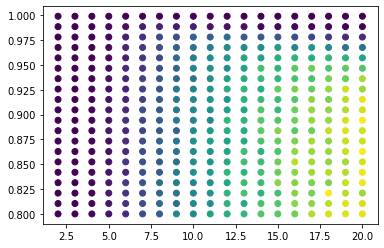

In [21]:
fig, ax = plt.subplots()

ax.scatter(df.group, df.r, c=df.prob)

# ok so correct data
groups = [i for i in range(2,21)]
r_vals = df[df.group == 2].r.to_list()

In [22]:
"""
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
"""

"\nSMALL_SIZE = 8\nMEDIUM_SIZE = 10\nBIGGER_SIZE = 15\n\nplt.rc('font', size=BIGGER_SIZE)          # controls default text sizes\nplt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title\nplt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels\nplt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels\nplt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels\nplt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize\nplt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title\n"

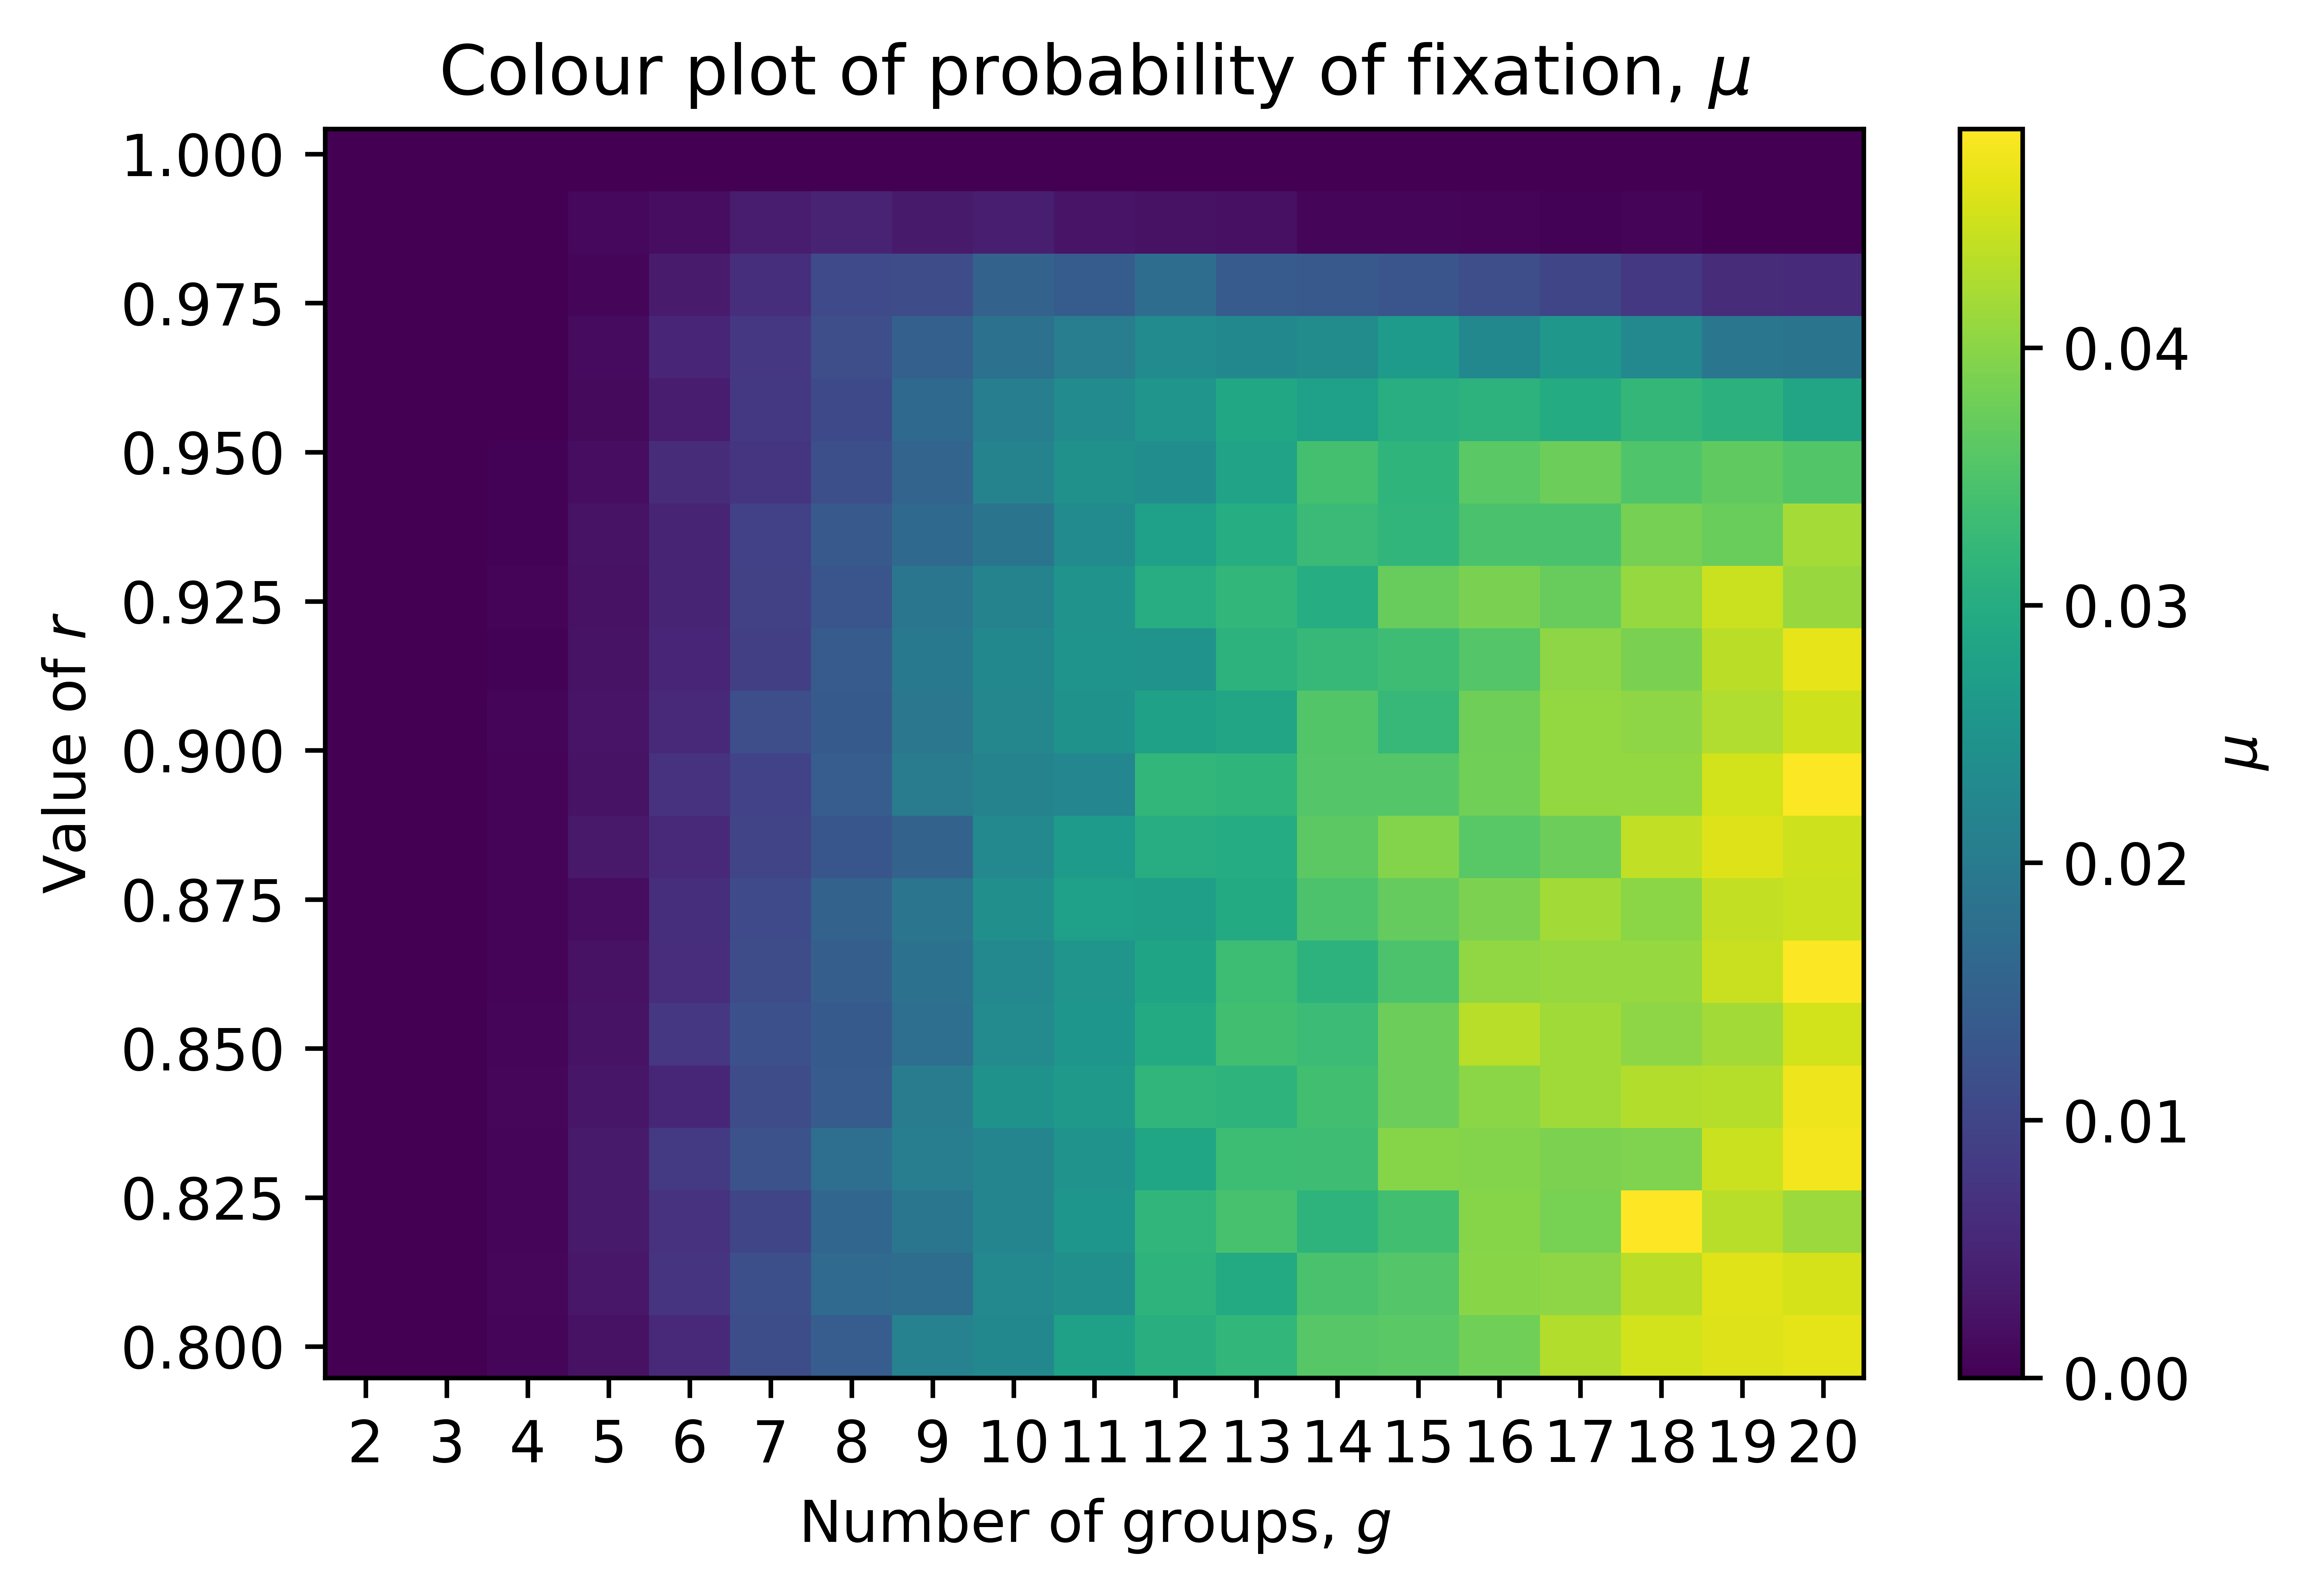

In [23]:
fig.clf()

fig, ax = plt.subplots(dpi=1200)

n = df.copy()

n.sort_values(['r','group'], inplace=True)

res = n.prob.to_numpy()

res = res.reshape(20,19)

X, Y = np.meshgrid(range(2, 21), np.linspace(0.8, 0.999, 20))
plot = ax.pcolormesh(X, Y, res, shading='auto')
fig.colorbar(plot, label="$\mu$")

ax.set_title(f"Colour plot of probability of fixation, $\mu$", fontsize=12)

ax.set(
       xlabel="Number of groups, $g$",
       ylabel="Value of $r$",
       xticks=groups
       )

fig.savefig('figs/better_colplot.png')

/var/folders/qf/ls8tfsdj4dl72c8sdyw287xh0000gn/T/ipykernel_7865/470552664.py:5: RuntimeWarning: invalid value encountered in true_divide
  maxres = [row/max(row) for row in res]


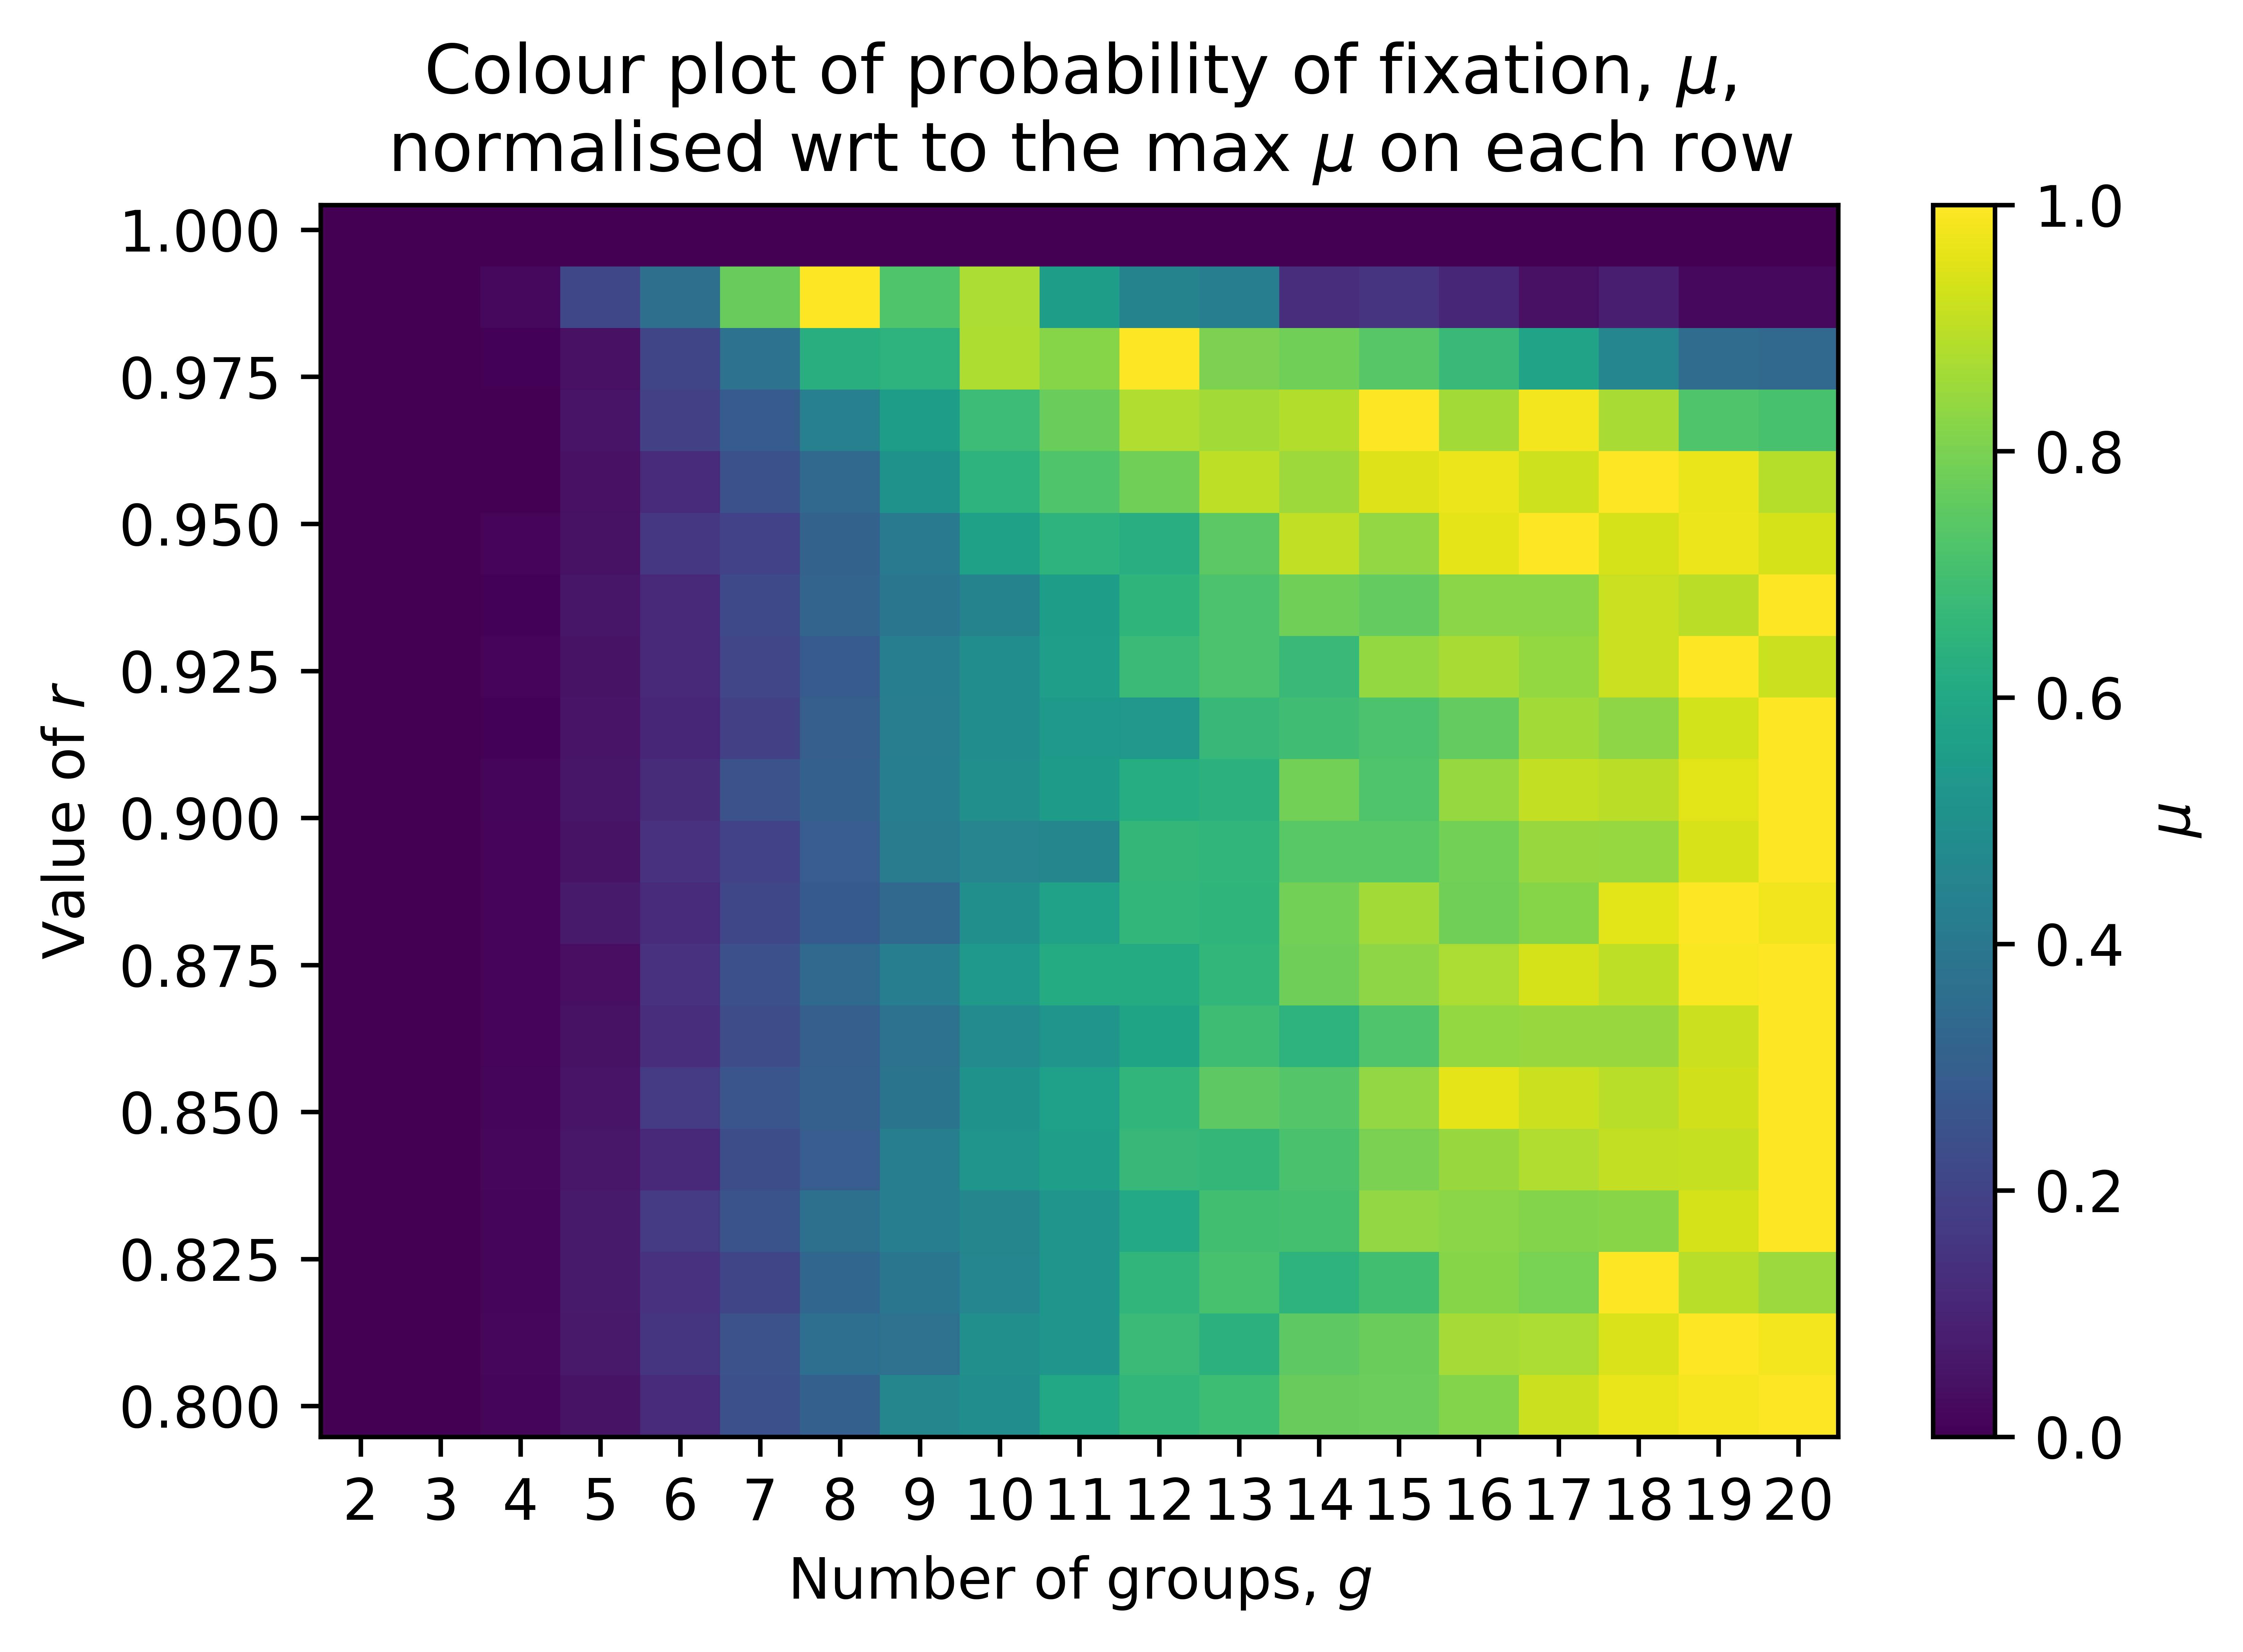

In [24]:
fig.clf()

fig, ax = plt.subplots(dpi=1200)

maxres = [row/max(row) for row in res]
maxres[-1] = np.zeros(19)

plot = ax.pcolormesh(X, Y, maxres, shading='auto')
fig.colorbar(plot, label="$\mu$")

ax.set_title(f"Colour plot of probability of fixation, $\mu$,\n normalised wrt to the max $\mu$ on each row", fontsize=12)

ax.set(
       xlabel="Number of groups, $g$",
       ylabel="Value of $r$",
       xticks=groups
       )

fig.savefig('figs/better_with_max.png')

In [25]:
"""
fig.clf()

fig, axs = plt.subplots(3, 1, figsize=(8,10), dpi=1200)

(ax1, ax2, ax3) = axs

fig.text(0.5, 0.90, "Probability of fixation, $\mu$ against the number of groups in the population, $g$.", ha='center', va='center')
fig.text(0.5, 0.08, 'Number of groups in the population, $g$', ha='center', va='center')
fig.text(0.01, 0.5, 'Fixation probability, $\mu$', ha='center', va='center', rotation='vertical')

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

ax1.plot(df[df.r == r_vals[-2]].group, df[df.r == r_vals[-2]].prob)
ax1.annotate(f'$r = {round(r_vals[-2],4)}$', xy=(0.84, 0.91), xycoords='axes fraction', bbox=bbox_args, fontsize=9)

ax2.plot(df[df.r == r_vals[-3]].group, df[df.r == r_vals[-3]].prob)
ax2.annotate(f'$r = {round(r_vals[-3],4)}$', xy=(0.84, 0.91), xycoords='axes fraction', bbox=bbox_args, fontsize=9)

ax3.plot(df[df.r == r_vals[-4]].group, df[df.r == r_vals[-4]].prob)
ax3.annotate(f'$r = {round(r_vals[-4],4)}$', xy=(0.84, 0.10), xycoords='axes fraction', bbox=bbox_args, fontsize=9)

fig"""
#fig.savefig("figs/r_cols.png", dpi=1200)

'\nfig.clf()\n\nfig, axs = plt.subplots(3, 1, figsize=(8,10), dpi=1200)\n\n(ax1, ax2, ax3) = axs\n\nfig.text(0.5, 0.90, "Probability of fixation, $\\mu$ against the number of groups in the population, $g$.", ha=\'center\', va=\'center\')\nfig.text(0.5, 0.08, \'Number of groups in the population, $g$\', ha=\'center\', va=\'center\')\nfig.text(0.01, 0.5, \'Fixation probability, $\\mu$\', ha=\'center\', va=\'center\', rotation=\'vertical\')\n\nbbox_args = dict(boxstyle="round", fc="0.8")\narrow_args = dict(arrowstyle="->")\n\nax1.plot(df[df.r == r_vals[-2]].group, df[df.r == r_vals[-2]].prob)\nax1.annotate(f\'$r = {round(r_vals[-2],4)}$\', xy=(0.84, 0.91), xycoords=\'axes fraction\', bbox=bbox_args, fontsize=9)\n\nax2.plot(df[df.r == r_vals[-3]].group, df[df.r == r_vals[-3]].prob)\nax2.annotate(f\'$r = {round(r_vals[-3],4)}$\', xy=(0.84, 0.91), xycoords=\'axes fraction\', bbox=bbox_args, fontsize=9)\n\nax3.plot(df[df.r == r_vals[-4]].group, df[df.r == r_vals[-4]].prob)\nax3.annotate(f\'$r

In [26]:
"""
fig.clf()

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(3, 2, figsize=(6,12), dpi=1200)

fig.text(0.5, 0.90, "Probability of fixation, $\mu$ against the value of $r$.", ha='center', va='center')
fig.text(0.5, 0.08, 'Value of $r$', ha='center', va='center')
fig.text(0.01, 0.5, 'Fixation probability, $\mu$', ha='center', va='center', rotation='vertical')

ax1.plot(df[df.group == 8].r, df[df.group == 8].prob)
ax1.annotate('$Groups = 8$', xy=(0.80, 0.91), xycoords='axes fraction', bbox=bbox_args, fontsize=9)

ax2.plot(df[df.group == 12].r, df[df.group == 12].prob)
ax2.annotate('$Groups = 12$', xy=(0.80, 0.91), xycoords='axes fraction', bbox=bbox_args, fontsize=9)

ax3.plot(df[df.group == 15].r, df[df.group == 15].prob)
ax3.annotate('$Groups = 15$', xy=(0.80, 0.91), xycoords='axes fraction', bbox=bbox_args, fontsize=9)
"""
#fig.savefig("figs/g_cols",dpi=1200)

'\nfig.clf()\n\nfig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(3, 2, figsize=(6,12), dpi=1200)\n\nfig.text(0.5, 0.90, "Probability of fixation, $\\mu$ against the value of $r$.", ha=\'center\', va=\'center\')\nfig.text(0.5, 0.08, \'Value of $r$\', ha=\'center\', va=\'center\')\nfig.text(0.01, 0.5, \'Fixation probability, $\\mu$\', ha=\'center\', va=\'center\', rotation=\'vertical\')\n\nax1.plot(df[df.group == 8].r, df[df.group == 8].prob)\nax1.annotate(\'$Groups = 8$\', xy=(0.80, 0.91), xycoords=\'axes fraction\', bbox=bbox_args, fontsize=9)\n\nax2.plot(df[df.group == 12].r, df[df.group == 12].prob)\nax2.annotate(\'$Groups = 12$\', xy=(0.80, 0.91), xycoords=\'axes fraction\', bbox=bbox_args, fontsize=9)\n\nax3.plot(df[df.group == 15].r, df[df.group == 15].prob)\nax3.annotate(\'$Groups = 15$\', xy=(0.80, 0.91), xycoords=\'axes fraction\', bbox=bbox_args, fontsize=9)\n'

In [35]:
col1 = 'orange'
col2 = 'red'
col3 = 'cyan'


fig.clf()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3.75), gridspec_kw={'width_ratios': [2,1]}, dpi=1200)

ax1.plot(df[df.r == r_vals[-2]].group, df[df.r == r_vals[-2]].prob/max(df[df.r == r_vals[-2]].prob),
         color=col1, linestyle='solid', label=f"r = {round(r_vals[-2], 4)}")
ax1.plot(df[df.r == r_vals[-3]].group, df[df.r == r_vals[-3]].prob/max(df[df.r == r_vals[-3]].prob),
         color=col2, linestyle='dotted', label=f"r = {round(r_vals[-3], 4)}")
ax1.plot(df[df.r == r_vals[-4]].group, df[df.r == r_vals[-4]].prob/max(df[df.r == r_vals[-4]].prob),
         color=col3, linestyle='dashdot', label=f"r = {round(r_vals[-4], 4)}")

ax1.set_title("Probability of fixation, $\mu$ against the number of groups in the population, $g$,\n normalised wrt to the peak $\mu$.", fontsize=12)

ax1.set(
    xlabel='Number of groups in the population, $g$',
    ylabel='Normalised fixation probability, $\mu$'
)

ax1.legend()

plot = ax2.pcolormesh(X, Y, maxres, shading='auto')
fig.colorbar(plot, label="normalised $\mu$")

ax2.set_title(f"Colour plot of probability of fixation, $\mu$,\n normalised wrt to the max $\mu$ on each row", fontsize=12)

ax2.set(
       xlabel="Number of groups",
       ylabel="Value of r",
       xticks=groups[::2]
       )

ax2.hlines(r_vals[-2:-5:-1], 2, 20, colors=[col1, col2, col3], linestyles=['solid','dotted','dashdot'],
           linewidths=4)

fig
#fig.savefig('figs/const_r.png')

In [28]:
fig.clf()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3.75), gridspec_kw={'width_ratios': [2,1]}, dpi=1200)

maxres = np.array(maxres)
# note that format is maxres[rvals, groupvals] the value to put in the square brackets is the group you want -2

ax1.plot(r_vals, maxres[:,6],
         color=col1, linestyle='solid', label=f"groups = 8")
ax1.plot(r_vals, maxres[:,10],
         color=col2, linestyle='dotted', label=f"groups = 12")
ax1.plot(r_vals, maxres[:,13],
         color=col3, linestyle='dashdot', label=f"groups = 15")

ax1.set_title("Probability of fixation, $\mu$ against the value of $r$, normalised wrt the peak $\mu$\n at each value of $r$.", fontsize=12)

ax1.set(
    xlabel='Value of $r$',
    ylabel='Normalised fixation probability, $\mu$'
)

ax1.legend()

plot = ax2.pcolormesh(X, Y, maxres, shading='auto')
fig.colorbar(plot, label="normalised $\mu$")

ax2.set_title(f"Colour plot of probability of fixation, $\mu$,\n normalised wrt to the max $\mu$ on each row", fontsize=12)
ax2.set(
       xlabel="Number of groups",
       ylabel="Value of r",
       xticks=groups[::2]
       )

ax2.vlines([8,12,15], 0.8, 1, colors=[col1, col2, col3], linestyles=['solid','dotted','dashdot'],
           linewidths=4)

fig.savefig('figs/const_g.png')

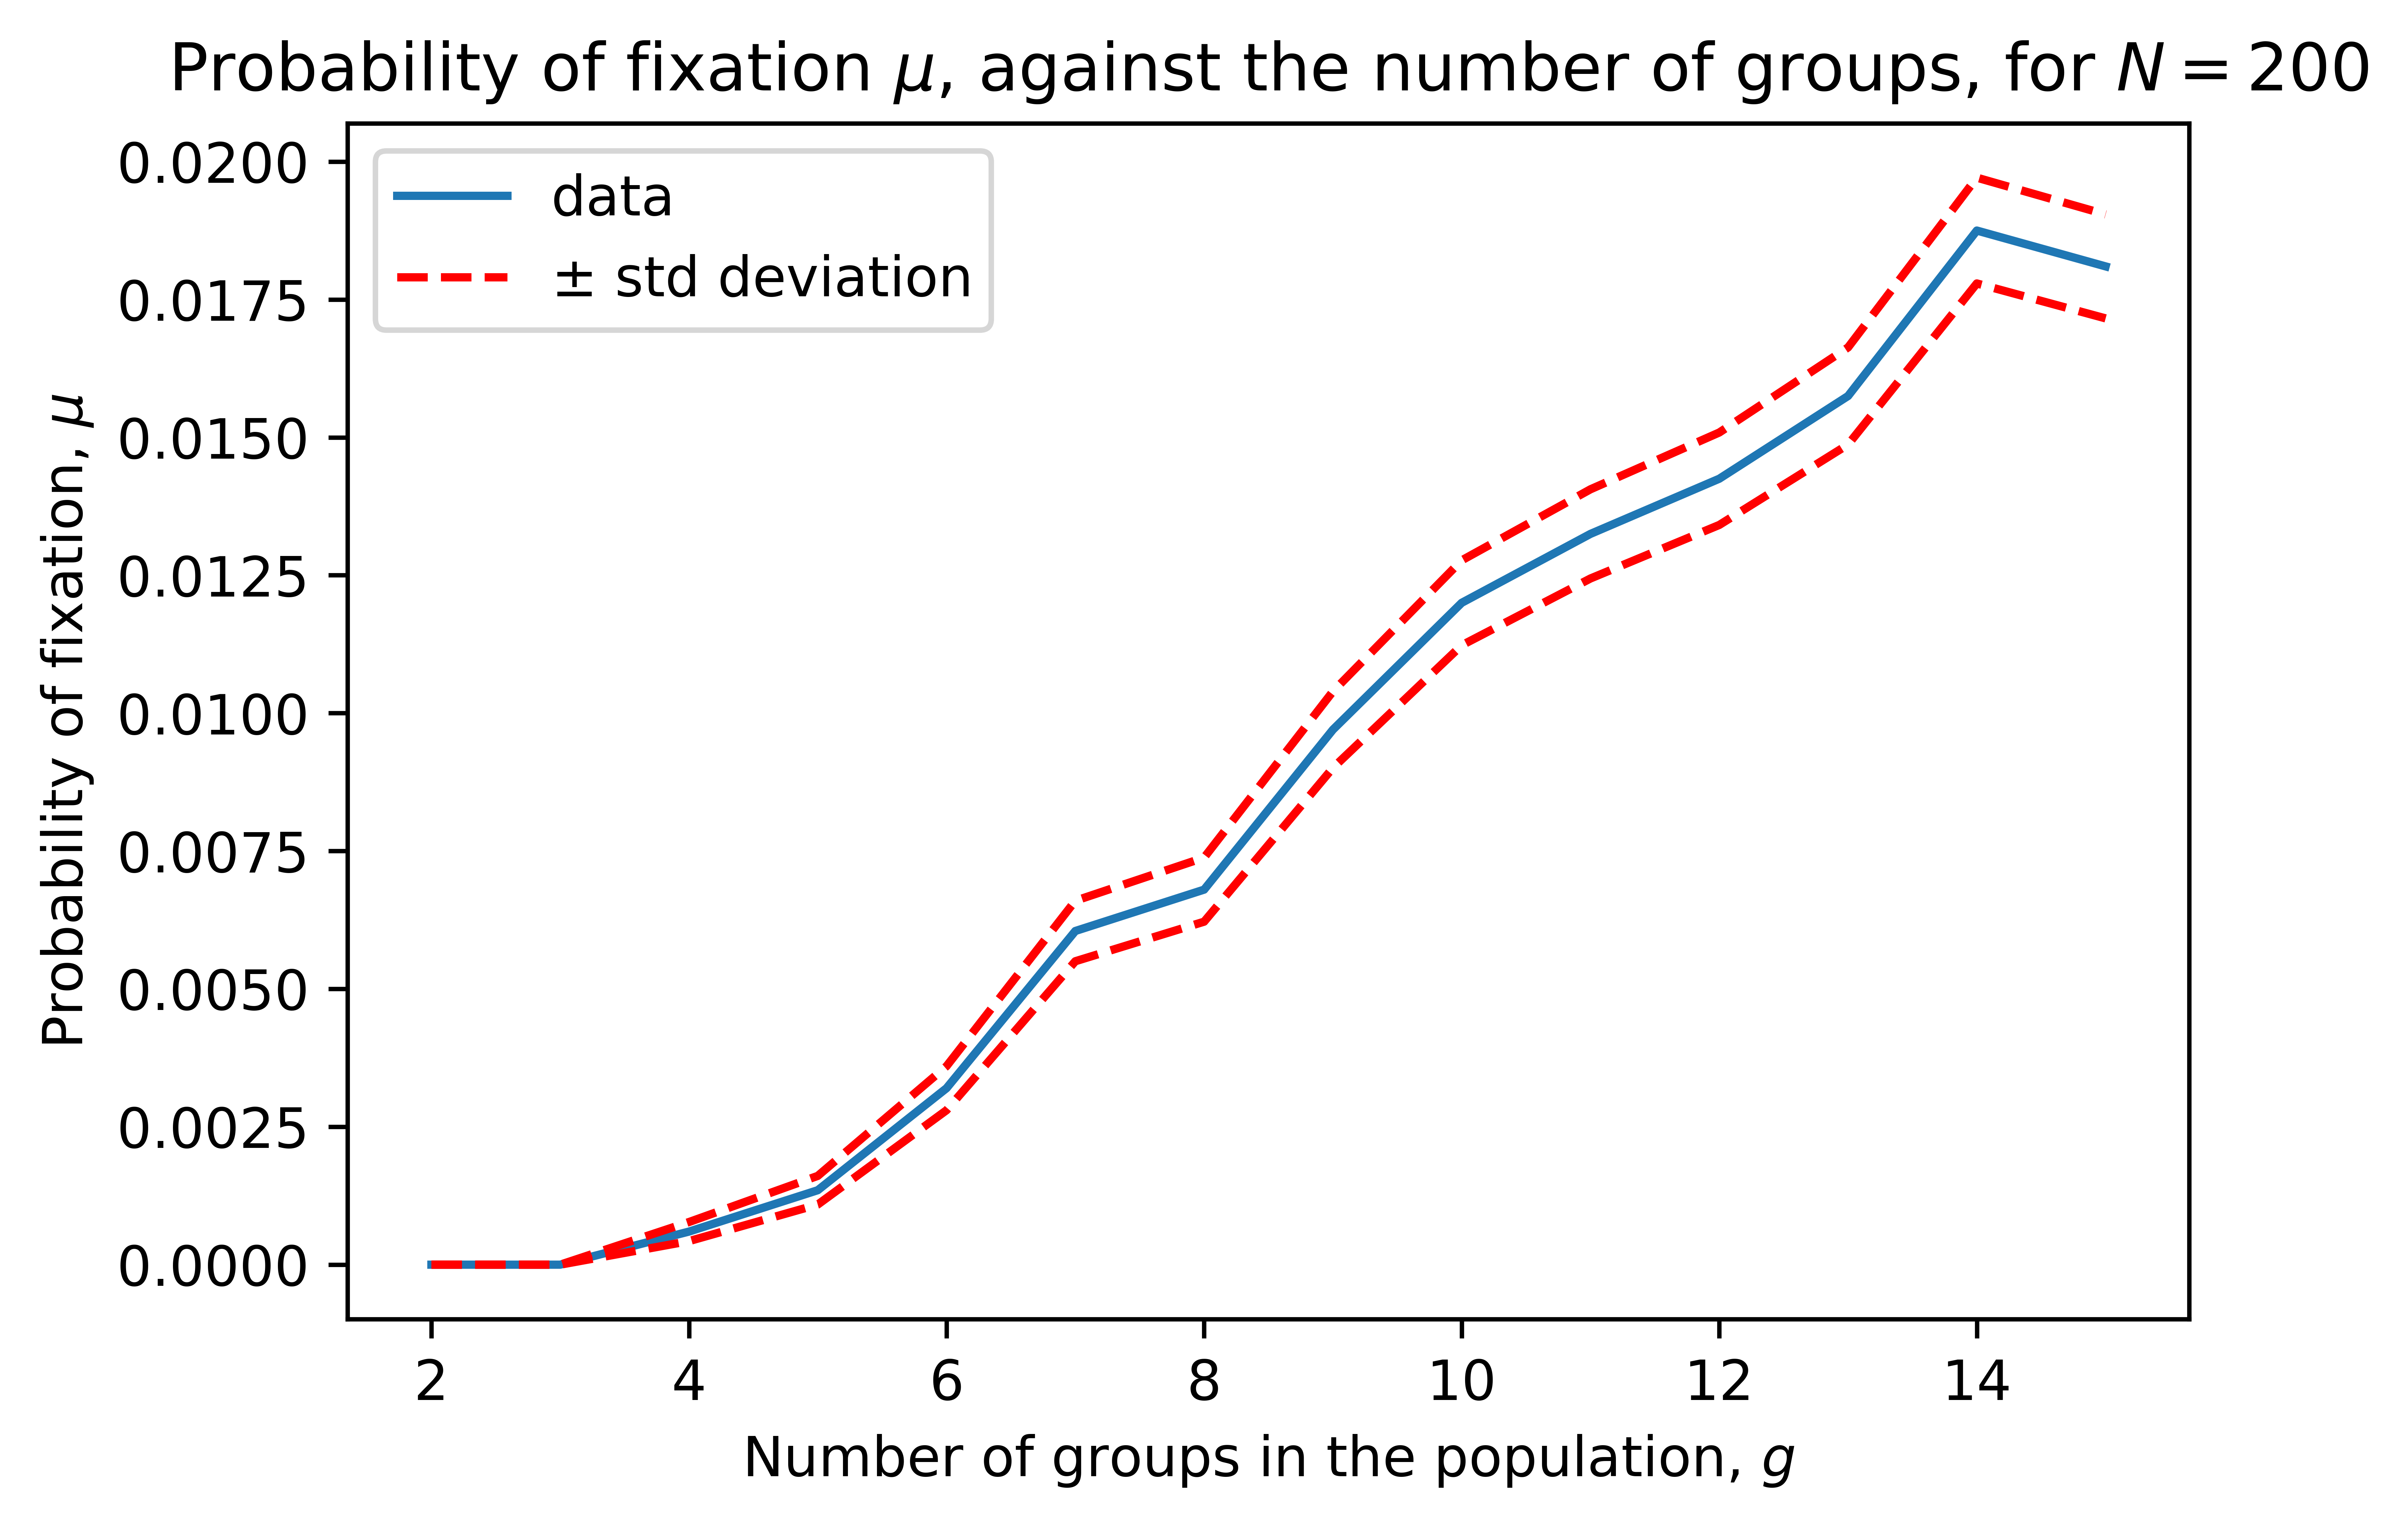

In [29]:
g = [i for i in range(2,16)]
p = [0,0,0.0006,0.00135,0.0032,0.00605,0.0068,0.0097,0.012,0.01325,0.01425,0.01575,0.01875,0.0181]
p = np.array(p)
trials = 200*100
std_deviation = np.sqrt(p*(1-p)/trials)
std_plus = p + std_deviation
std_minus = p - std_deviation


fig.clf()

fig, ax = plt.subplots(dpi=1200)

ax.plot(g, p, label="data")
ax.plot(g, std_plus, color='red', linestyle='dashed', label="$\pm$ std deviation")
ax.plot(g, std_minus, color='red', linestyle='dashed')

ax.set_title("Probability of fixation $\mu$, against the number of groups, for $N=200$", fontsize=12)

ax.set(
    xlabel="Number of groups in the population, $g$",
    ylabel="Probability of fixation, $\mu$"
)

ax.legend()

fig.savefig("figs/N=200.png")

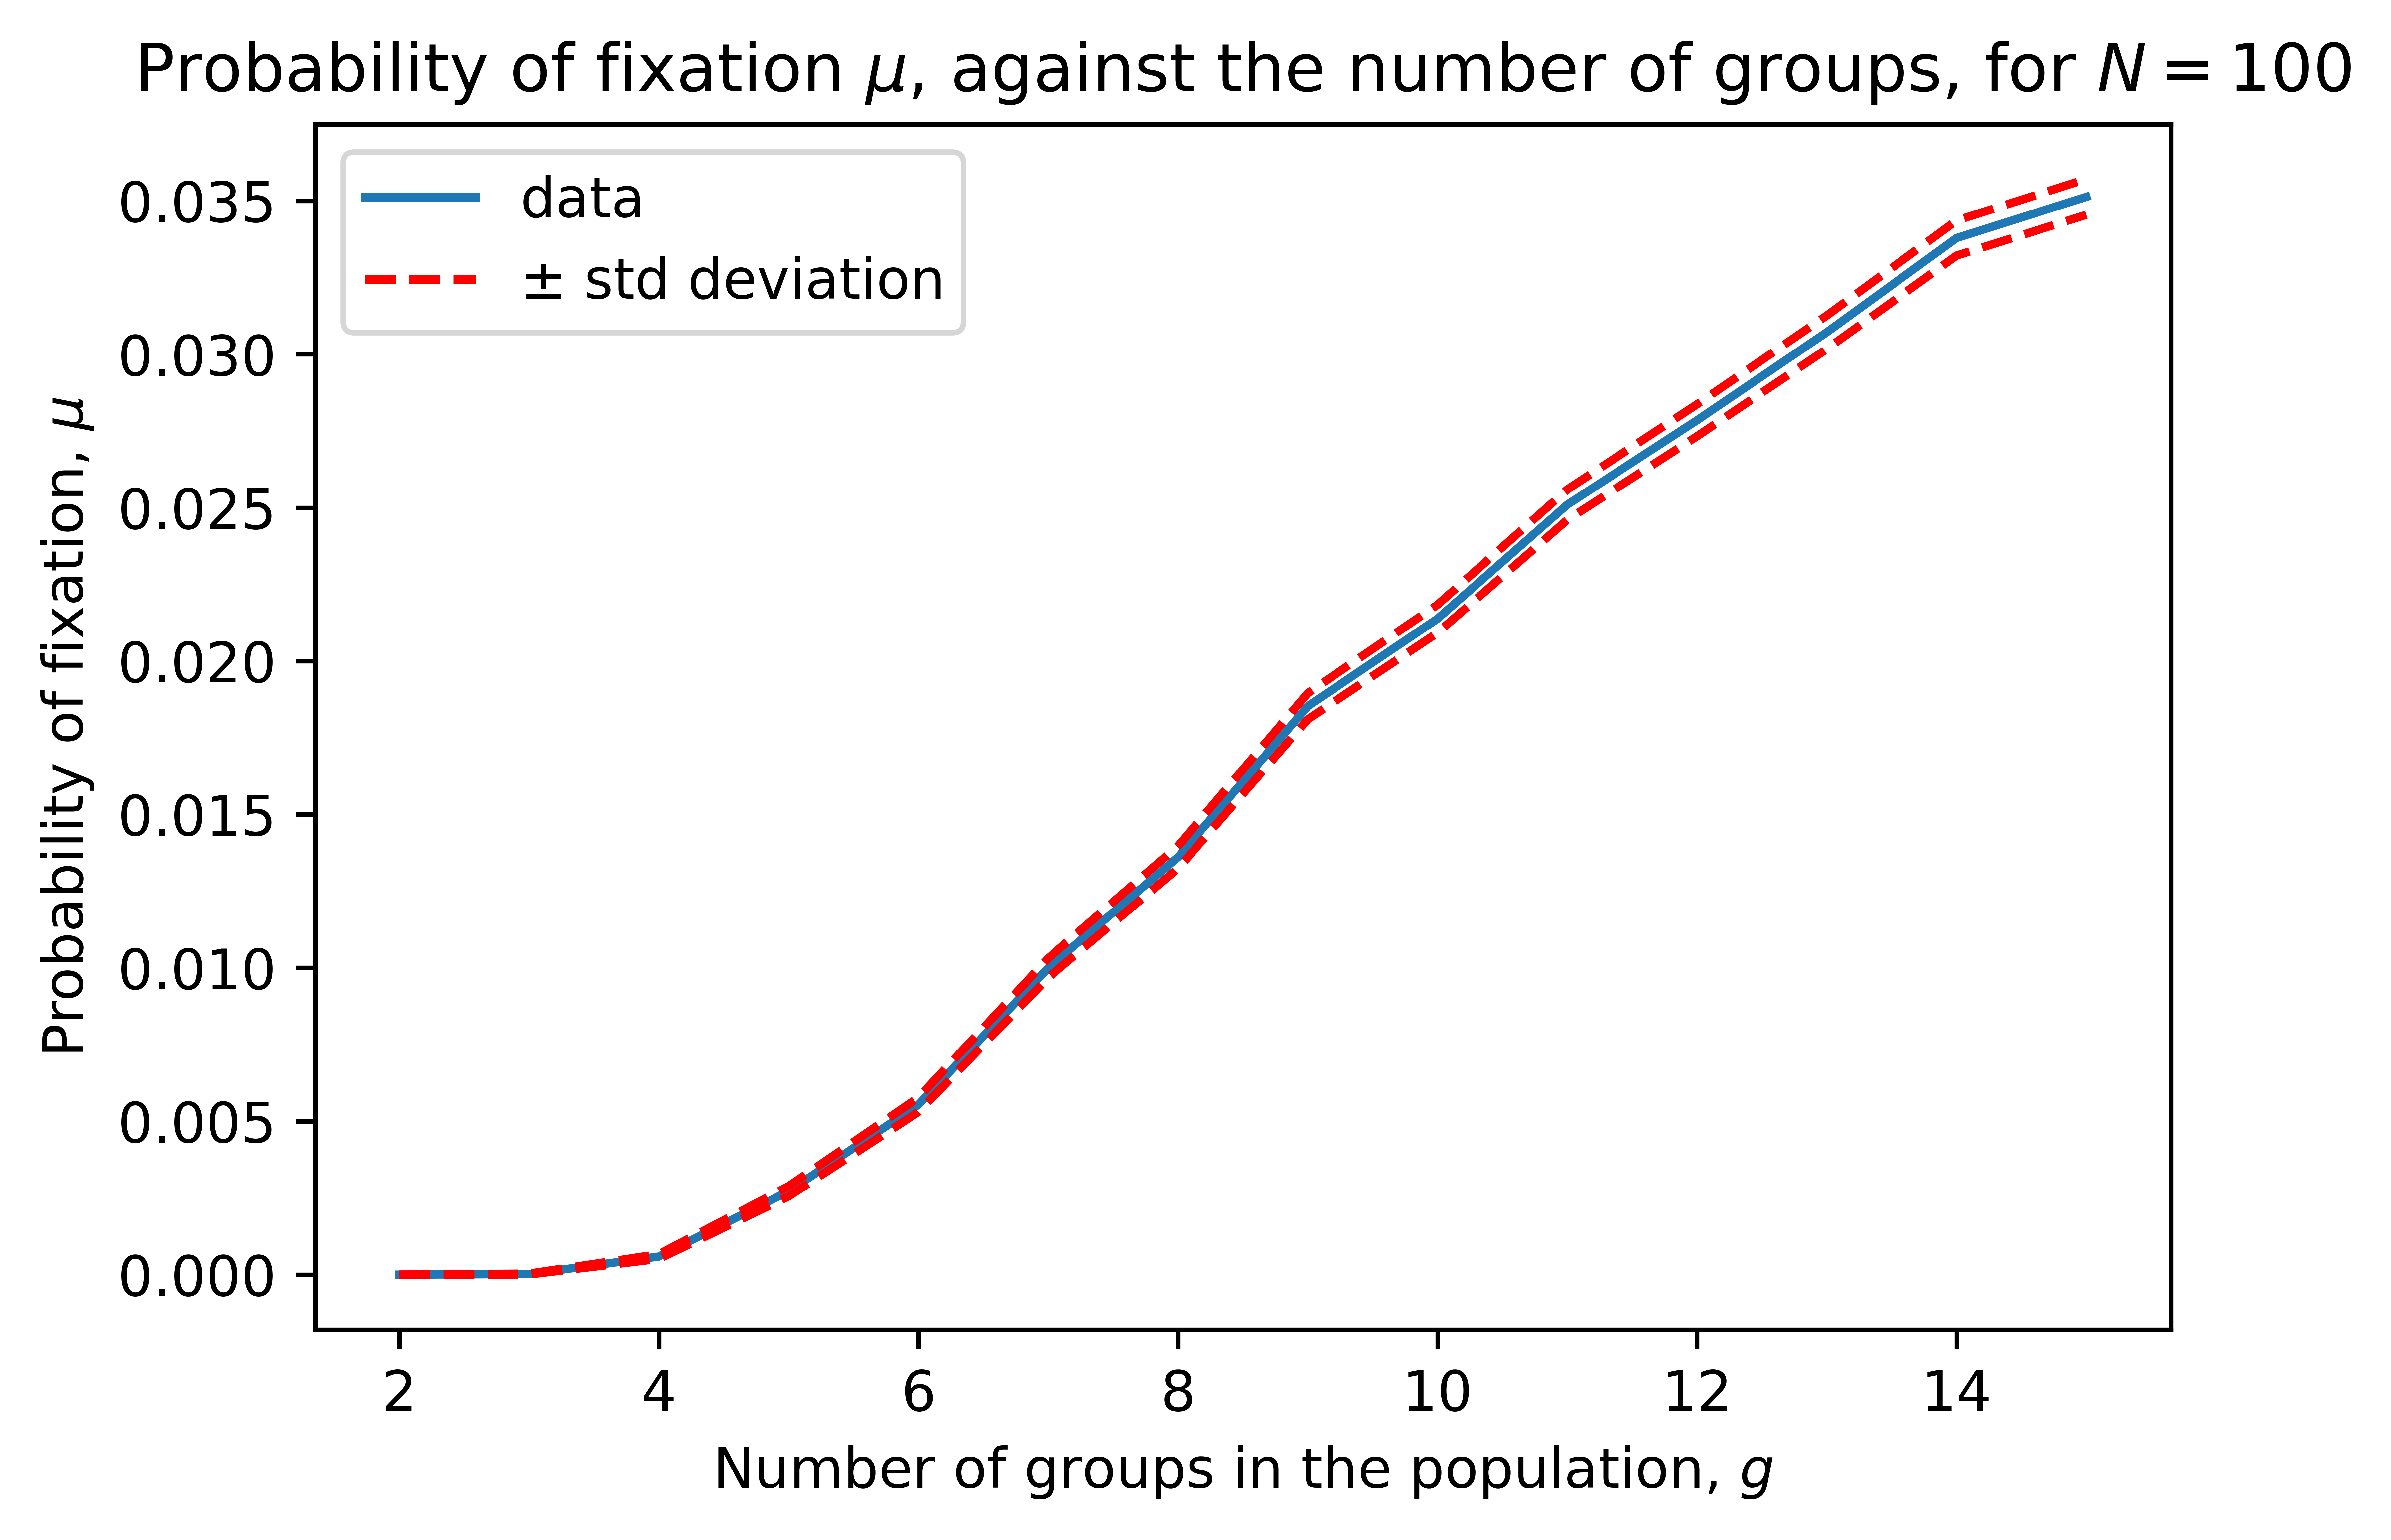

In [30]:
fig.clf()

fig, ax = plt.subplots(dpi=1200)

trials = 100000
p = [0.0,0.00002,0.00059,0.00272,0.00554,0.01,0.01361,0.01853,0.02138,0.0251,0.02785,0.03072,0.03379,0.03513]
p = np.array(p)

std_deviation = np.sqrt(p*(1-p)/trials)
std_plus = p + std_deviation
std_minus = p - std_deviation

ax.plot(g, p, label="data")
ax.plot(g, std_plus, color='red', linestyle='dashed', label="$\pm$ std deviation")
ax.plot(g, std_minus, color='red', linestyle='dashed')

ax.set_title("Probability of fixation $\mu$, against the number of groups, for $N=100$", fontsize=12)

ax.set(
    xlabel="Number of groups in the population, $g$",
    ylabel="Probability of fixation, $\mu$"
)

ax.legend()

fig.savefig('figs/N=100.png')